# e-비즈니스학과 201721493 오지혜

# 목차
-	소셜네트워크 분석 개요
-	네트워크 이론 기초
-	소셜 네트워크 분석 지표
-	소셜 네트워크 분석 도구 및 분석 사례

## 소셜 미디어의 등장과 확산
-	스마트 디바이스의 급격한 확산
-	SNS 즉 소셜미디어는 온라인 인맥 네트워크와 메시지 정보가 결합된 구조

## 소셜 미디어의 유형분류
소셜미디어의 사용 목적별로 유형을 세분화하면 관계.소통형, 관계.협업형, 공유.소통형, 공유.협업형으로 나눌 수 있음

## 1. 소셜 네트워크 분석의 개요
- 네트워크 이론의 개요 및 역사
    - 네트워크 : 각각의 객체들이 상호 연결된 구조, 복수의 노드들이 연결된 구조
    - 구성요소 : node(Node, vertex)와 링크(link, edge)
    - 노드 : 고유한 속성을 가지고 있는 행위자
    - 링크 : 노드들간의 관계(relation)

e.g.,세계 항공기 노선도, 수도권 지하철 노선도 : 어디가 중심인지, 모여 있는 부분, 연결의 세기 파악할 수 있음 -> 네트워크를 통해 체계적, 수학적으로 분석의 지표를 볼 수 있음

- 네트워크 이론의 역사
    - 오일러의 ‘쾨니히스베르크 다리 건너기 문제’
    - 모레노의 소시오 그램 : 전체적인 사회 관계를 파악할 수 있음
    - 바베라스와 리빗의 실험 : 네트워크의 중심성에 대한 연구를 촉발
    - 밀그램의 6단계 분리이론 : 좁은 세상 효과 -> 싸이월드의 파도타기
    - 그라노베터의 ‘약한 연결의 강점’ : 약한 사회적 관계의 유용성에 대한 새로운 시사점을 제시
    - 프리만의 ‘중심성 지표’ 개발
    - 버트의 ‘구조적 공백’
    - 왓츠, 스트로가츠의 ‘좁은 세상 네트워크’
    - 바라바시, 알버트, 정하웅의 ‘무척도 네트워크’ : 큰 네트워크 운영위해 허브를 만들어야 함, 메시지.유통망 구축시 허브를 통해 전파되게 해야함 

## 2. 네트워크 이론의 기초
그래프의 기본 개념
- 네트워크를 표현하는 네트워크 모델링 과정에서 중요하게 사용되는 것이 그래프, 행렬
- 그래프의 기본개념 : 그래프 이론, 무방향 네트워크, 방향 네트워크, 이진 네트워크와 가중네트워크 그래프
    
    
그래프의 표현 방법
- 인접행렬 방식
- 노드 리스트 방식
- 엣지 리스트 방식
    
    
네트워크 유형
- 방향성과 가중치에 따른 분류(4가지 유형)
- 관계의 위상에 따른 분류 : Ring, Mesh, Star(의사소통, 문제해결 빠름), Fully connected, Line, Tree, Bus, Hub-and-Spoke
- 네트워크 크기에 따른 분류 : Micro(소규모), Meso(중규모), Macro(대규모), Super-macro(초대규모)
- 분석 대상에 따른 분류 : 전체 네트워크, 하위 네트워크(컴포넌트, 파당, 클러스터, 에고 네트워크 등)


In [1]:
 # networkX 모듈 가져오기
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore') 

In [11]:
# 대칭 네트워크 (무방향)
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


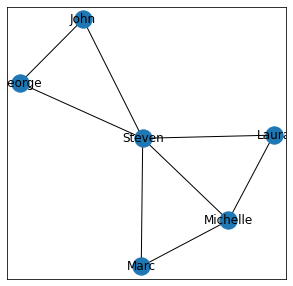

In [12]:
#대칭 네트워크 시각화
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

In [13]:
#비대칭 네트워크 (방향성)
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

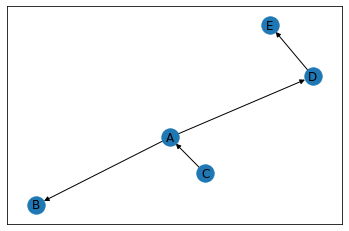

In [14]:
#비대칭 네트워크 시각화
nx.spring_layout(G_asymmetric) #노드가 네트워크에서 명확하게 표시되기 위해 spring_layout()과 draw_networkx() 차례로 사용
nx.draw_networkx(G_asymmetric)

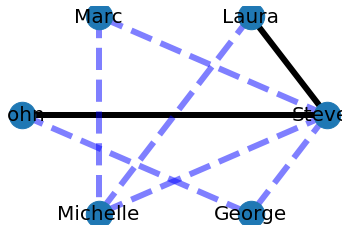

In [77]:
#가중 네트워크
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  

# 노드
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# 링크(엣지)
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# 라벨
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

## 3. 소셜 네트워크 분석 지표

### 3.1.	네트워크 기본 속성 분석
-	네트워크 수준의 속성 분석
    - 네트워크 크기 : 네트워크를 구성하는 노드들의 수
    - 네트워크 밀도 : 얼마나 연결이 촘촘하게 되어있는지
    - 포괄성 : 네트워크가 얼마나 전체 노드를 포괄하고 있는지
    
    
-	노드 수준의 속성 분석
    - 연결정도 : 해당 노드에 직접 연결되어 있는 노드들의 개수, 노드의 활동성을 볼 수 있음
    - 연결강도 : 노드간 링크의 강도
    - 연결거리 : 두개의 특정 노드들 사이에 존재하는 다양한 연결경로 중에서 가장 적은 수의 링크 단계를 거치는 경로, 즉 가장 짧은 연결 경로 
    - 직경 : 네트워크 상의 모든 연결거리 중에서 가장 긴 연결거리
    - 평균연결거리 : 네트워크 내 모든 노드 쌍의 최단 연결거리를 산출하여 평균값을 계산한 것
    
    
-	네트워크에 내재된 속성 분석
    - 상호성
    - 군집화 계수 : 군집화는 네트워크 상에서 특정 부분의 노드들이 밀접하게 연결되어 다른 부분보다 네트워크 밀도가 높아지는 현상을 말한다. 군집화 계수란 군집화의 정도를 나타내는 지표를 뜻한다. 


In [31]:
# 연결정도
nx.degree(G_symmetric, 'Michelle')

3

In [40]:
#최단경로
nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

In [41]:
#연결거리
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

In [72]:
#Michelle의 군집화 계수 
nx.clustering(G_symmetric,'Michelle')

0.6666666666666666

In [37]:
#Laura의 군집화 계수
nx.clustering(G_symmetric,'Laura')

1.0

In [30]:
#평균 군집화 계수
nx.average_clustering(G_symmetric)

0.8277777777777778

### 3.2. 중심성 분석
중심성 지표 : 소셜 네트워크 분석 지표 중에서 일반적으로 가장 많이 사용되는 지표로 한행위자가 전체 네트워크에서 중심에 위치하는 정도로 표현하는 지표 
- 연결정도 중심성 : 친구 수 -> 양적으로 봄
- 근접 중심성 : 얼마나 중요한 사람 근처에 있는지, 해당 노드와 나머지 노드들간의 연결거리를 이용하여 계산할 수 있음
- 매개 중심성 : 네트워크 상에서 특정 노드가 다른 노드들의 중간에서 얼마나 매개자 역할을 하고 있느지를 측정하는 지표
- 아이겐 벡터 중심성 : 양과 함께 quality도 봄


In [44]:
#연결정도 중심성
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

In [45]:
#근접중심성
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

In [81]:
#매개중심성
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

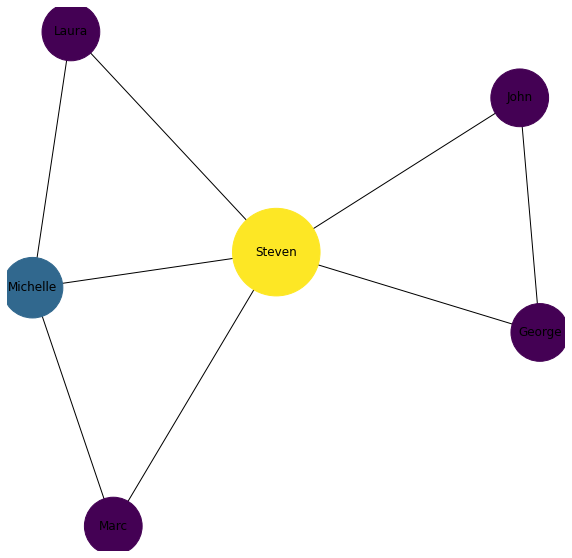

In [78]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [82]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Steven', 'Michelle', 'Laura', 'Marc', 'John']

In [47]:
#아이겐 벡터 중심성
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

## 4. 소셜 네트워크 분석 도구 및 분석 사례
### 4.1. 소셜 네트워크 분석 도구
- NodeXL
- UCINET
- Pajek
- NetMiner
- Gephi : 복잡한 네트워크 그릴 수 있음, 네트워크 그리는 최고의 도구

### 4.2. 소셜 네트워크 분석 사례
- 하이퍼 링크 네트워크 분석
- 트위터 네트워크 분석
- 트위터 에고 네트워크 분석
- 유튜브 동영상 네트워크 분석
- 페이스북 네트워크 분석
- 의미 네트워크 분석

In [57]:
#페이스북 네트워크 분석

import pandas as pd

df = pd.read_csv('/Users/oh/Documents/아주대/3-2/캡스톤/facebook_combined.txt')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0 1     88233 non-null  object
dtypes: object(1)
memory usage: 689.4+ KB


In [59]:
df.tail()

,0 1
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038
88232,4031 4038


In [60]:
G_fb = nx.read_edgelist('/Users/oh/Documents/아주대/3-2/캡스톤/facebook_combined.txt', create_using = nx.Graph(), nodetype=int)

In [61]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


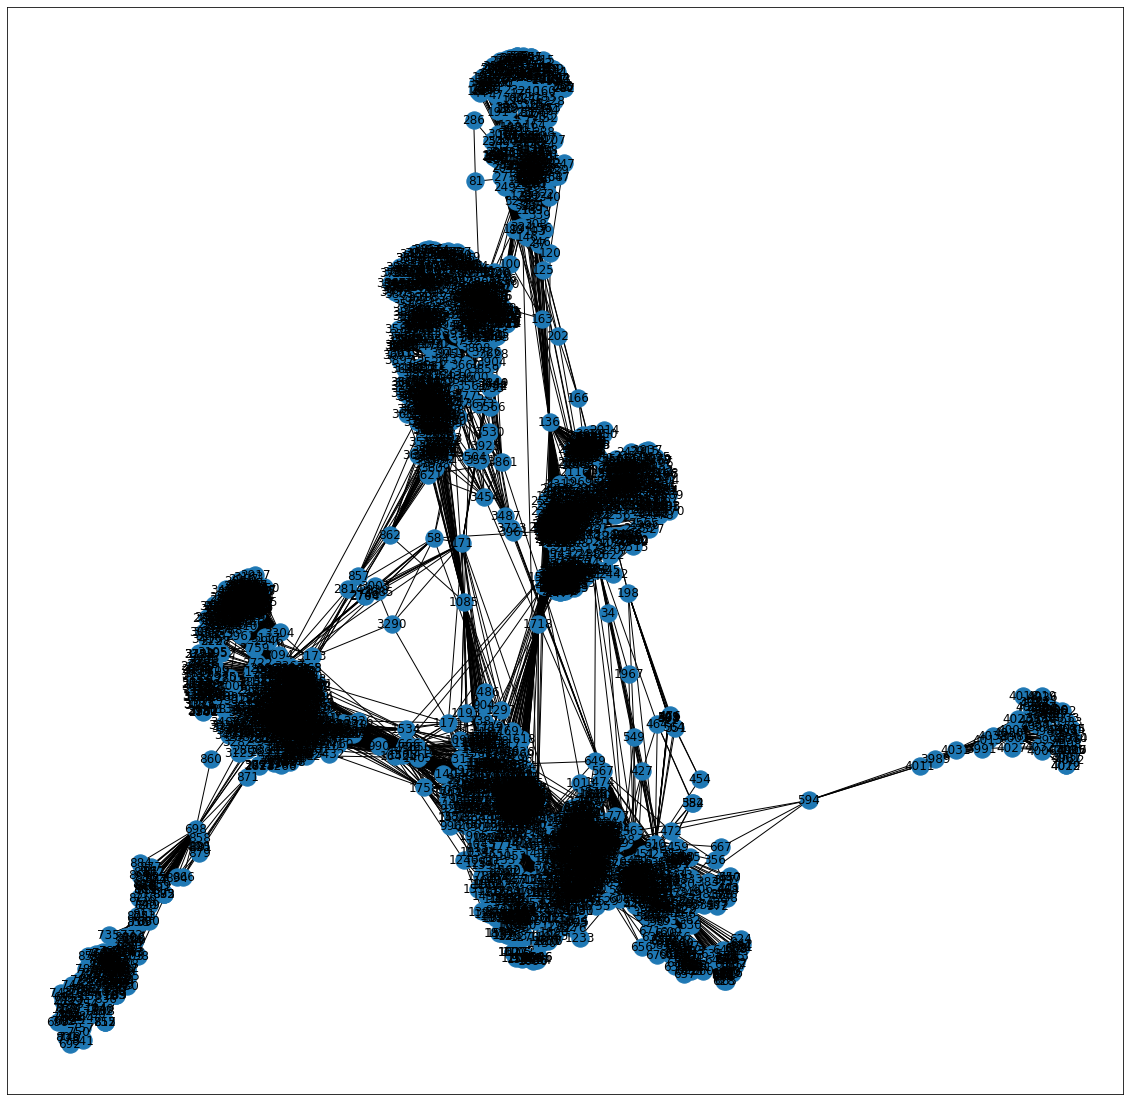

In [62]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

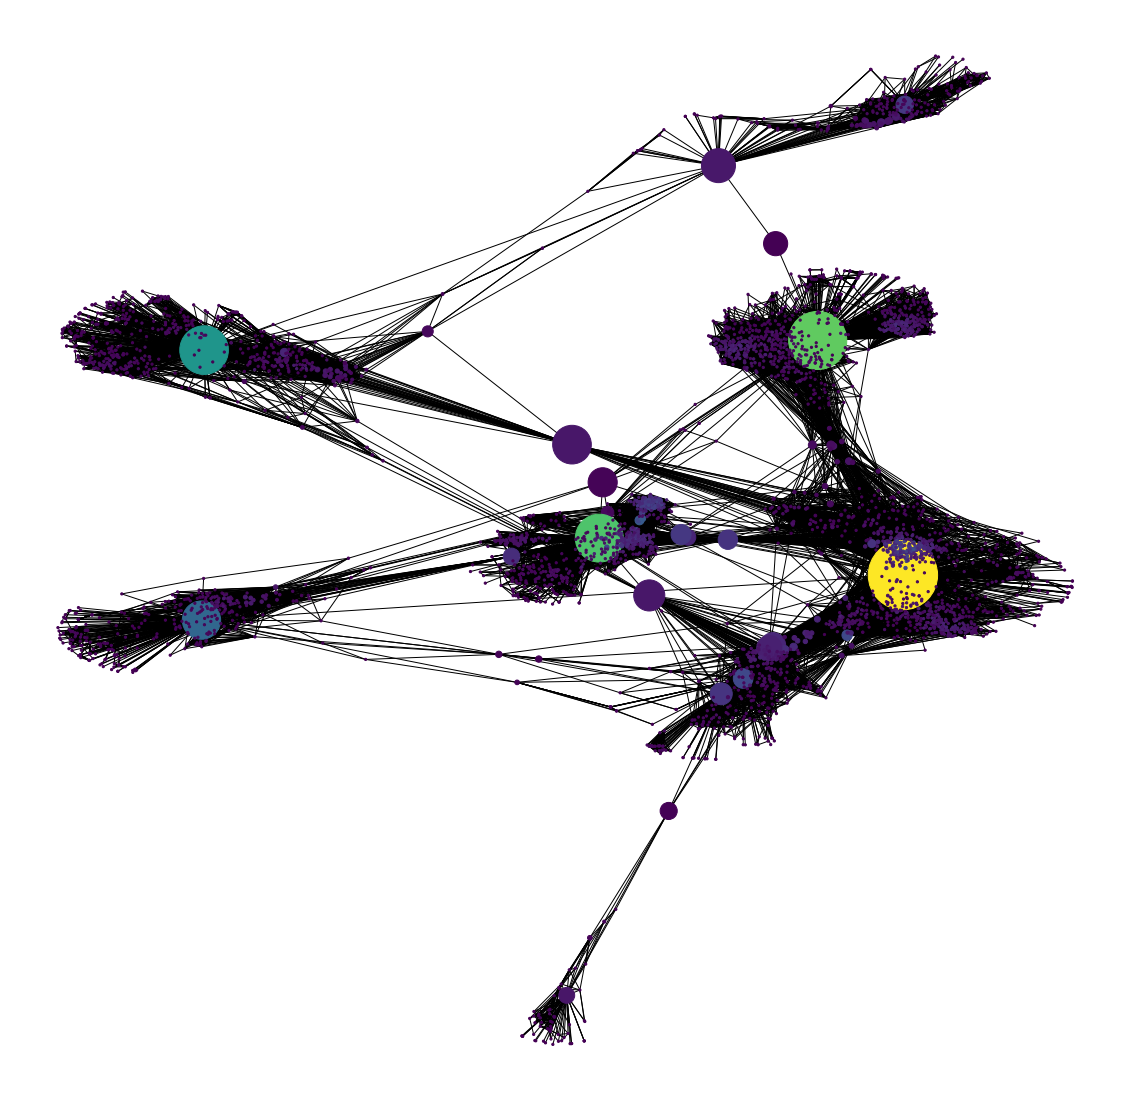

In [63]:
#Betweenness Centrality를 사용하여 노드 색상이 Degree, 노드 크기에 따라 달라지도록 네트워크 시각화
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [64]:
#매개 중심성이 가장 높은 노드의 레이블 
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]